# 당뇨병 수치

## 1. 데이터 가져오기

In [31]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

dir(data)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [32]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [33]:
data.target.shape
data.target[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [34]:
import pandas as pd

df_X = pd.DataFrame(data=data.data, columns=data.feature_names)
df_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [35]:
df_y = pd.Series(data=data.target)
df_y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
dtype: float64

## 2. 모델에 입력할 데이터 X 준비하기

In [36]:
X = df_X.values
print(type(X), X.shape)

<class 'numpy.ndarray'> (442, 10)


## 3. 모델에 입력할 데이터 y 준비하기

In [37]:
y = df_y.values
print(type(y), y.shape)

<class 'numpy.ndarray'> (442,)


## 4. train 데이터와 test 데이터로 분리하기

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [39]:
# MinMax 스케일링

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 5. 모델 준비하기

In [40]:
import numpy as np

n_features = X_train.shape[-1]
W = np.random.rand(n_features)
b = 0
print(W)
print(b)

[0.6585807  0.69724326 0.28032092 0.7552198  0.74361594 0.04900583
 0.47087899 0.02546537 0.93011988 0.27454503]
0


In [41]:
def model(X, W, b):
    return X.dot(W) + b

## 6. 손실함수 loss 정의하기

In [42]:
def loss_mse(y, pred):
    loss = ((y - pred) ** 2).mean()
    return loss

## 7. 기울기를 구하는 gradient 함수 구현하기

In [43]:
def gradient(X, W, b, y_pred, y):
    N = len(W)
    y_pred = model(X, W, b)
    dw = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dw, db

## 8. 하이퍼 파라미터 설정

In [44]:
lr = 0.001
n_epoch = 1000

## 9. 모델 학습

In [45]:
losses = []
for epoch in range(1, n_epoch+1):
    # 1. 모델 인퍼런스
    y_pred = model(X_train, W, b)
    
    # 2. 손실 구하기
    loss = loss_mse(y_train, y_pred)
    
    # 3. 기울기 구하기
    dw, db = gradient(X_train, W, b, y_pred, y_train)
    
    # 4. 기울기 업데이트
    W -= lr*dw
    b -= lr*db
    
    # 5. 손실 저장
    losses.append(loss)
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, loss={loss})")
    

Epoch 100, loss=3761.44500366441)
Epoch 200, loss=3379.490273850462)
Epoch 300, loss=3192.4376693329164)
Epoch 400, loss=3090.3405335524367)
Epoch 500, loss=3031.8550644761567)
Epoch 600, loss=2996.7573231045735)
Epoch 700, loss=2974.6160995653368)
Epoch 800, loss=2959.893032995627)
Epoch 900, loss=2949.5687738700153)
Epoch 1000, loss=2941.9532205702785)


## 10. test 데이터에 대한 성능 확인

In [46]:
y_pred = model(X_test, W, b)

loss = loss_mse(y_test, y_pred)
print("MSE:", loss)

2896.484247672996


## 11. 정답 데이터와 예측한 데이터 시각화 하기

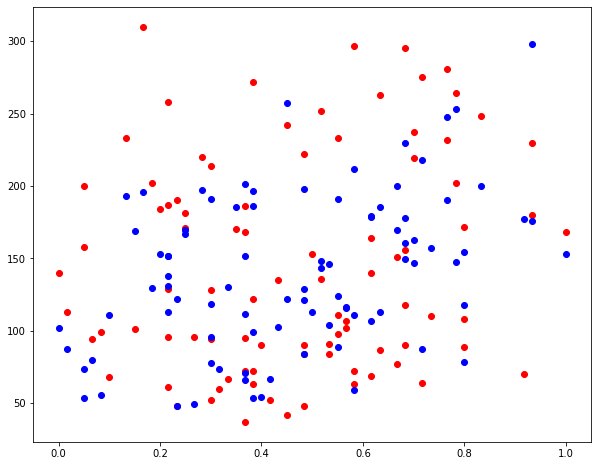

In [47]:
import matplotlib.pyplot as plt

%matplotlib inline

fig = plt.figure(figsize=(10, 8))

plt.scatter(X_test[:, 0], y_test, c="red")
plt.scatter(X_test[:, 0], y_pred, c="blue")